In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.ndimage import sobel, gaussian_filter
from matplotlib.colors import ListedColormap


%matplotlib widget

In [2]:
D = np.array([
    [0, 5, 2, 9, 4, 1, 7, 11, 15, 3],
    [5, 0, 3, 4, 1, 4, 2, 6, 10, 2],
    [2, 3, 0, 7, 2, 1, 5, 9, 13, 1],
    [9, 4, 7, 0, 5, 8, 2, 2, 6, 6],
    [4, 1, 2, 5, 0, 3, 3, 7, 11, 1],
    [1, 4, 1, 8, 3, 0, 6, 10, 14, 2],
    [7, 2, 5, 2, 3, 6, 0, 4, 8, 4],
    [11, 6, 9, 2, 7, 10, 4, 0, 4, 8],
    [15, 10, 13, 6, 11, 14, 8, 4, 0, 12],
    [3, 2, 1, 6, 1, 2, 4, 8, 12, 0]
])

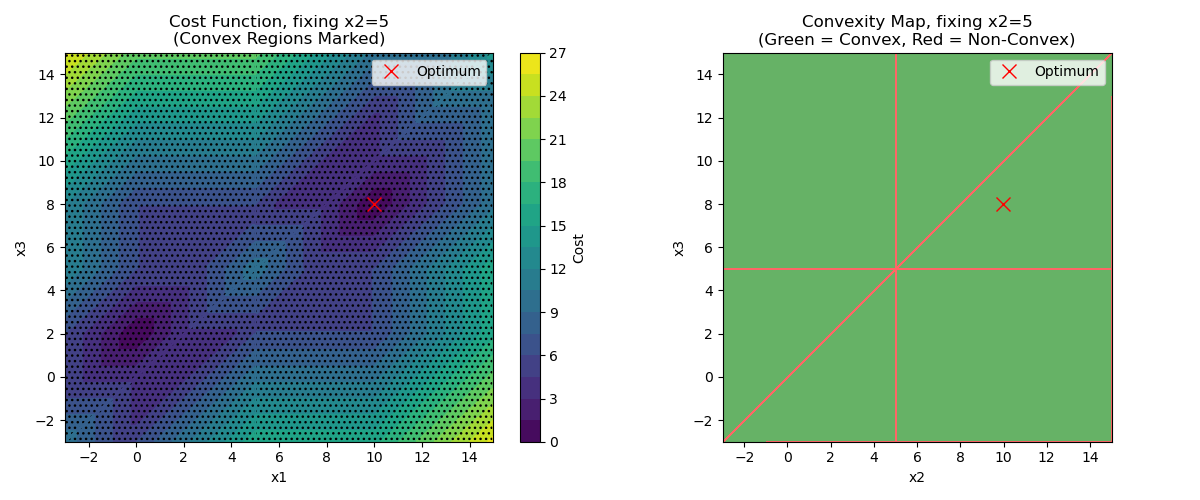

In [5]:
x2 = 5
x_guess = np.linspace(-3, 15, 1000)
y_guess = np.linspace(-3, 15, 1000)
X, Y = np.meshgrid(x_guess, y_guess)

d12 = np.abs(X - x2)
d13 = np.abs(X - Y)
d23 = np.abs(x2 - Y)
cost = np.abs(d12 - D[0,1]) + np.abs(d13 - D[0,2]) + np.abs(d23 - D[1,2])

cost_smooth = gaussian_filter(cost, sigma=1)

dx = sobel(cost_smooth, axis=0)
dy = sobel(cost_smooth, axis=1)
dxx = sobel(dx, axis=0)
dxy = sobel(dx, axis=1)
dyy = sobel(dy, axis=1)

eig1 = 0.5*(dxx + dyy + np.sqrt((dxx-dyy)**2 + 4*dxy**2))
eig2 = 0.5*(dxx + dyy - np.sqrt((dxx-dyy)**2 + 4*dxy**2))
convex_region = (eig1 >= -0.1) & (eig2 >= -0.1)  

min_idx = np.unravel_index(np.argmin(cost_smooth), cost_smooth.shape)
x1_opt = X[min_idx]
x3_opt = Y[min_idx]
plt.figure(figsize=(12, 5))

plt.subplot(121)
plt.contourf(X, Y, cost_smooth, levels=20, cmap='viridis')
plt.colorbar(label='Cost')
plt.contourf(X, Y, convex_region, levels=[0.5, 1.5], colors='none', 
              hatches=['...'], alpha=0)
plt.plot(x1_opt, x3_opt, 'rx', markersize=10, label='Optimum')
plt.title("Cost Function, fixing x2=5\n(Convex Regions Marked)")
plt.xlabel("x1")
plt.ylabel("x3")
plt.legend()

plt.subplot(122)
plt.imshow(convex_region, 
           extent=[x_guess.min(), x_guess.max(), y_guess.min(), y_guess.max()],
           origin='lower', 
           cmap=ListedColormap(['red', 'green']),
           alpha=0.6,
           interpolation='nearest')

plt.plot(x1_opt, x3_opt, 'rx', markersize=10, label='Optimum')
plt.title("Convexity Map, fixing x2=5\n(Green = Convex, Red = Non-Convex)")
plt.xlabel("x2")
plt.ylabel("x3")
plt.legend()

plt.tight_layout()
plt.savefig('plots/var_x2_5.png', dpi=300, bbox_inches='tight')
plt.show()

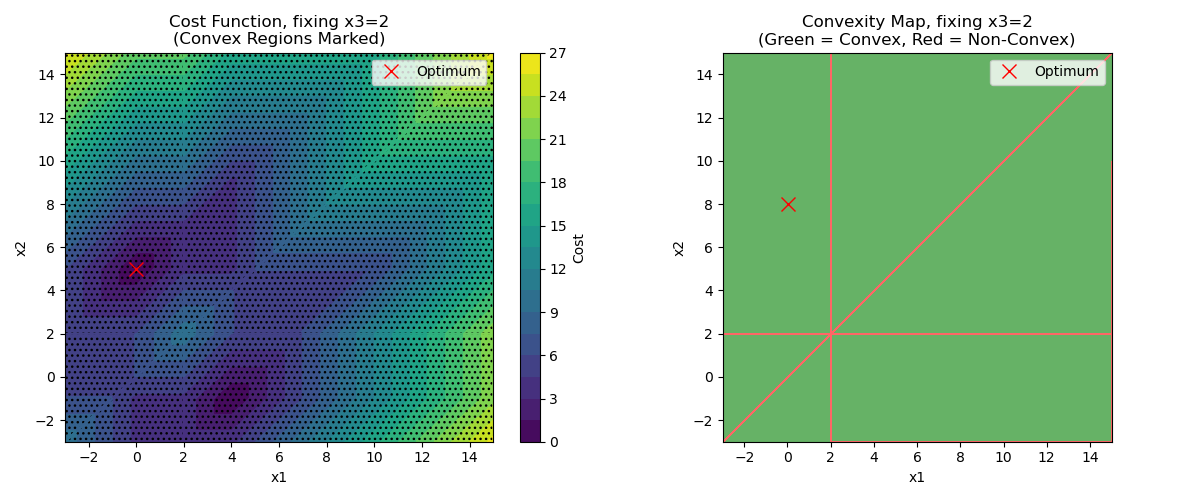

In [6]:
x3 = 2
x_guess = np.linspace(-3, 15, 1000)
y_guess = np.linspace(-3, 15, 1000)
X, Y = np.meshgrid(x_guess, y_guess)

d12 = np.abs(X - Y)
d13 = np.abs(X - x3)
d23 = np.abs(Y - x3)
cost = np.abs(d12 - D[0,1]) + np.abs(d13 - D[0,2]) + np.abs(d23 - D[1,2])

cost_smooth = gaussian_filter(cost, sigma=1)

dx = sobel(cost_smooth, axis=0)
dy = sobel(cost_smooth, axis=1)
dxx = sobel(dx, axis=0)
dxy = sobel(dx, axis=1)
dyy = sobel(dy, axis=1)

eig1 = 0.5*(dxx + dyy + np.sqrt((dxx-dyy)**2 + 4*dxy**2))
eig2 = 0.5*(dxx + dyy - np.sqrt((dxx-dyy)**2 + 4*dxy**2))
convex_region = (eig1 >= -0.1) & (eig2 >= -0.1)  

min_idx = np.unravel_index(np.argmin(cost_smooth), cost_smooth.shape)
x1_opt = X[min_idx]
x2_opt = Y[min_idx]
plt.figure(figsize=(12, 5))

plt.subplot(121)
plt.contourf(X, Y, cost_smooth, levels=20, cmap='viridis')
plt.colorbar(label='Cost')
plt.contourf(X, Y, convex_region, levels=[0.5, 1.5], colors='none', 
              hatches=['...'], alpha=0)
plt.plot(x1_opt, x2_opt, 'rx', markersize=10, label='Optimum')
plt.title("Cost Function, fixing x3=2\n(Convex Regions Marked)")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()

plt.subplot(122)
plt.imshow(convex_region, 
           extent=[x_guess.min(), x_guess.max(), y_guess.min(), y_guess.max()],
           origin='lower', 
           cmap=ListedColormap(['red', 'green']),
           alpha=0.6,
           interpolation='nearest')

plt.plot(x1_opt, x3_opt, 'rx', markersize=10, label='Optimum')
plt.title("Convexity Map, fixing x3=2\n(Green = Convex, Red = Non-Convex)")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()

plt.tight_layout()
plt.savefig('plots/var_x3_2.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
x_guess = np.linspace(0, 10, 1000)
y_guess = np.linspace(0, 10, 1000)
X, Y = np.meshgrid(x_guess, y_guess)

d23 = np.abs(X - Y)
cost = np.abs(d12 - D[1,2])

cost_smooth = gaussian_filter(cost, sigma=1)

dx = sobel(cost_smooth, axis=0)
dy = sobel(cost_smooth, axis=1)
dxx = sobel(dx, axis=0)
dxy = sobel(dx, axis=1)
dyy = sobel(dy, axis=1)

eig1 = 0.5*(dxx + dyy + np.sqrt((dxx-dyy)**2 + 4*dxy**2))
eig2 = 0.5*(dxx + dyy - np.sqrt((dxx-dyy)**2 + 4*dxy**2))
convex_region = (eig1 >= -0.1) & (eig2 >= -0.1)  

min_idx = np.unravel_index(np.argmin(cost_smooth), cost_smooth.shape)
x2_opt = X[min_idx]
x3_opt = Y[min_idx]
plt.figure(figsize=(12, 5))

plt.subplot(121)
plt.contourf(X, Y, cost_smooth, levels=20, cmap='viridis')
plt.colorbar(label='Cost')
plt.contourf(X, Y, convex_region, levels=[0.5, 1.5], colors='none', 
              hatches=['...'], alpha=0)
plt.plot(x2_opt, x3_opt, 'rx', markersize=10, label='Optimum')
plt.title("Cost Function\n(Convex Regions Marked)")
plt.xlabel("x2")
plt.ylabel("x3")
plt.legend()

plt.subplot(122)
plt.imshow(convex_region, 
           extent=[x_guess.min(), x_guess.max(), y_guess.min(), y_guess.max()],
           origin='lower', 
           cmap=ListedColormap(['red', 'green']),
           alpha=0.6,
           interpolation='nearest')

plt.plot(x2_opt, x3_opt, 'rx', markersize=10, label='Optimum')
plt.title("Convexity Map\n(Green = Convex, Red = Non-Convex)")
plt.xlabel("x2")
plt.ylabel("x3")
plt.legend()

plt.tight_layout()
plt.savefig('plots/fix_none_23.png', dpi=300, bbox_inches='tight')
plt.show()